# EDA

In [1]:
# Standard library
import pickle
import zipfile
from pathlib import Path

# Third party
import kaggle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, PowerTransformer, MinMaxScaler, PolynomialFeatures

import helper_functions as funcs

# Authenticate to the Kaggle API for data download
kaggle.api.authenticate()

## 1. Data acquisition

### 1.2. Download

In [2]:
# Create target directory
Path('../data/raw').mkdir(parents=True, exist_ok=True)

# Download latest version
kaggle.api.dataset_download_files(
    'bhanupratapbiswas/superstore-sales',
    path='../data/raw/'
)

Dataset URL: https://www.kaggle.com/datasets/bhanupratapbiswas/superstore-sales


### 1.2. Extract

In [3]:
with zipfile.ZipFile('../data/raw/superstore-sales.zip', mode='r') as archive:
    archive.extract('superstore_final_dataset (1).csv', '../data/raw')

### 1.3. Inspect

In [4]:
data_df = pd.read_csv('../data/raw/superstore_final_dataset (1).csv', encoding='unicode_escape')
data_df.head(50)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680
5,6,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

## 2. Feature distributions

### 2.1. Categorical features

In [6]:
categorical_features = ['Ship_Mode', 'Segment', 'City', 'State',
                        'Postal_Code', 'Region', 'Category', 'Sub_Category']

data_df[categorical_features].nunique()

Ship_Mode         4
Segment           3
City            529
State            49
Postal_Code     626
Region            4
Category          3
Sub_Category     17
dtype: int64

In [7]:
high_cardinality_features = ['City', 'Postal_Code', 'State']

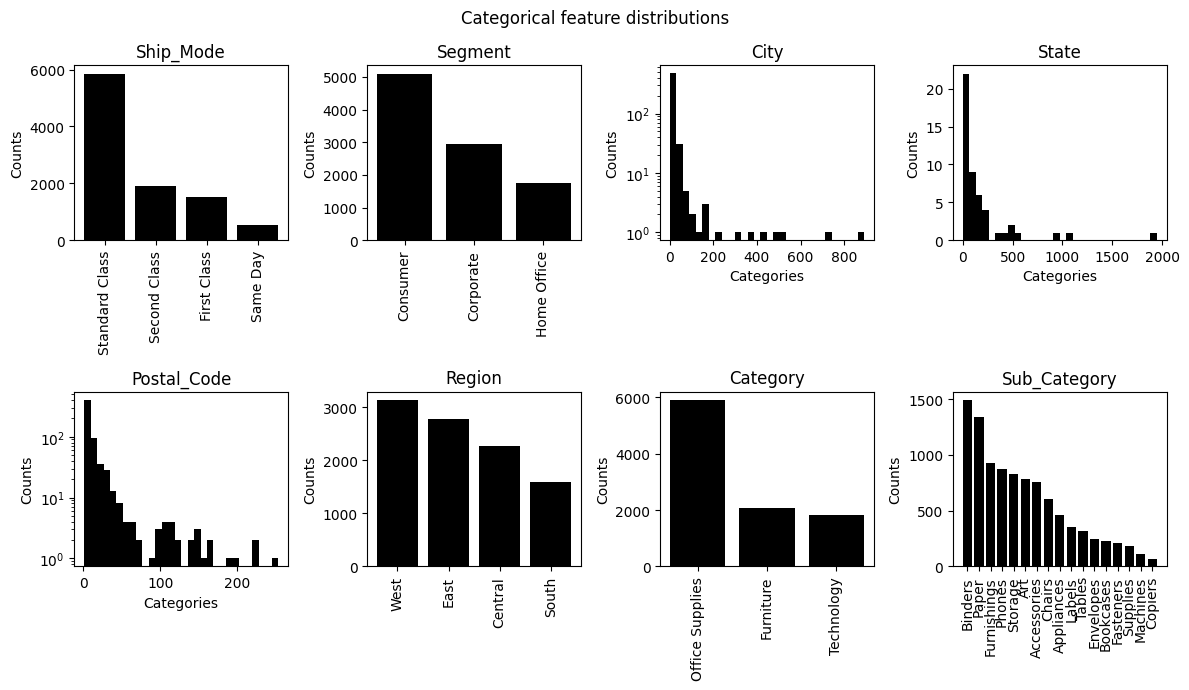

In [8]:
fig, axs = plt.subplots(2, 4, figsize=(12,7))
axs = axs.flatten()

fig.suptitle('Categorical feature distributions')

for i, feature in enumerate(categorical_features):

    level_counts = data_df[feature].value_counts()

    axs[i].set_title(feature)

    if feature in high_cardinality_features:
        axs[i].hist(level_counts.values, bins=30, color='black')
        axs[i].set_xlabel('Categories')

    else:
        axs[i].bar(level_counts.index, level_counts.values, color='black')
        axs[i].tick_params('x', labelrotation=90)

    if feature in ['City', 'Postal_Code']:
        axs[i].set_yscale('log')
    
    axs[i].set_ylabel('Counts')

fig.tight_layout()

### 2.2. Time features

In [9]:
data_df['Order_Date'] = pd.to_datetime(data_df['Order_Date'], format='%d/%m/%Y')
data_df['Ship_Date'] = pd.to_datetime(data_df['Ship_Date'], format='%d/%m/%Y')

#### 2.2.1 Number of orders

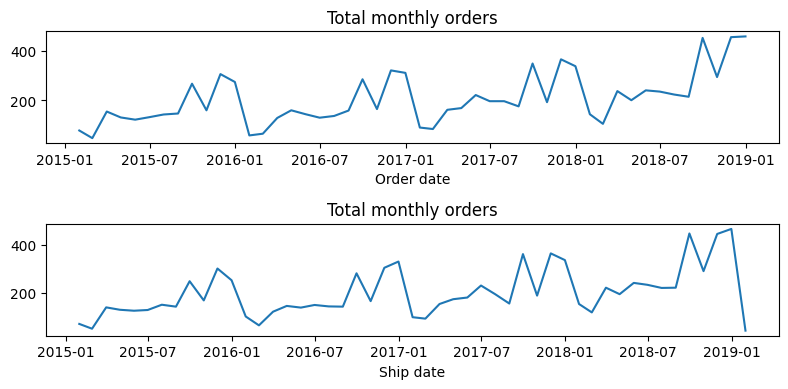

In [10]:
order_date = data_df.groupby('Order_Date').count()['Sales']
ship_date = data_df.groupby('Ship_Date').count()['Sales']

order_date = order_date.resample('ME').sum()
ship_date = ship_date.resample('ME').sum()

fig, axs = plt.subplots(2, 1, figsize=(8, 4))

axs[0].set_title('Total monthly orders')
axs[0].plot(order_date.index, order_date.values)
axs[0].set_xlabel('Order date')

axs[1].set_title('Total monthly orders')
axs[1].plot(ship_date.index, ship_date.values)
axs[1].set_xlabel('Ship date')

fig.tight_layout()

#### 2.2.1. Total sales

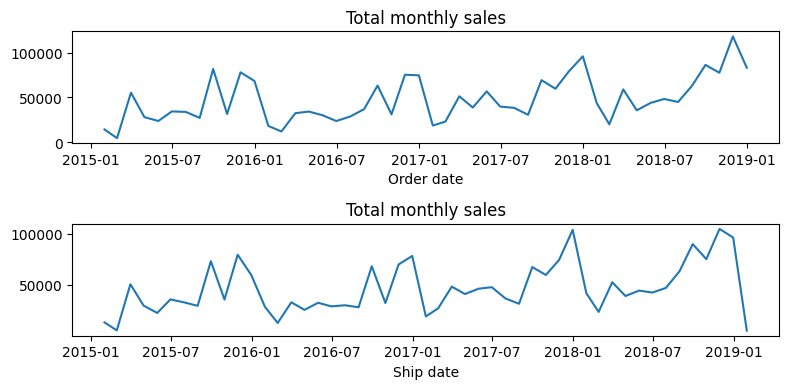

In [11]:
order_date = pd.Series(data_df['Sales'].values, index=data_df['Order_Date'])
ship_date = pd.Series(data_df['Sales'].values, index=data_df['Ship_Date'])

order_date = order_date.resample('ME').sum()
ship_date = ship_date.resample('ME').sum()

fig, axs = plt.subplots(2, 1, figsize=(8, 4))

axs[0].set_title('Total monthly sales')
axs[0].plot(order_date.index, order_date.values)
axs[0].set_xlabel('Order date')

axs[1].set_title('Total monthly sales')
axs[1].plot(ship_date.index, ship_date.values)
axs[1].set_xlabel('Ship date')

fig.tight_layout()

### 2.3. Sales

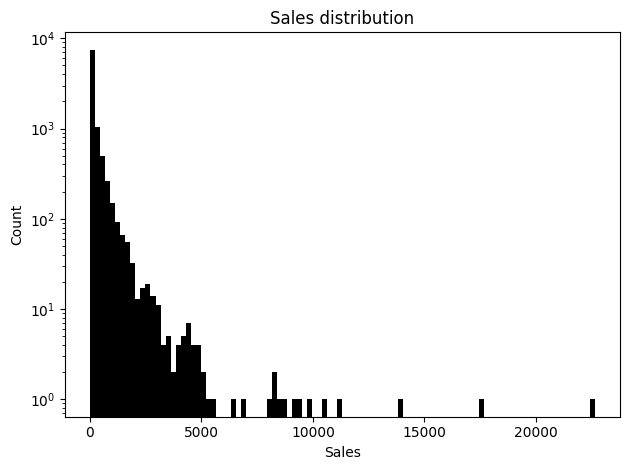

In [12]:
plt.title('Sales distribution')
plt.hist(data_df['Sales'], bins=100, color='black')
plt.yscale('log')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

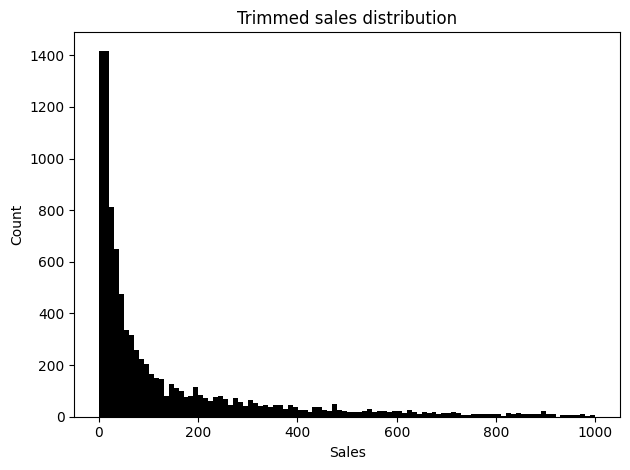

In [13]:
data_df = data_df[data_df['Sales'] < 1000]
data_df.describe()

plt.title('Trimmed sales distribution')
plt.hist(data_df['Sales'], bins=100, color='black')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 2. Feature engineering

### 2.1. Feature selection

In [14]:
categorical_features = ['Ship_Mode', 'Segment', 'City', 'State', 'Sub_Category']

data_df = data_df[categorical_features + ['Sales', 'Order_Date', 'Ship_Date']]
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9338 entries, 0 to 9799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Ship_Mode     9338 non-null   object        
 1   Segment       9338 non-null   object        
 2   City          9338 non-null   object        
 3   State         9338 non-null   object        
 4   Sub_Category  9338 non-null   object        
 5   Sales         9338 non-null   float64       
 6   Order_Date    9338 non-null   datetime64[ns]
 7   Ship_Date     9338 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 656.6+ KB


### 2.2. Order year, month & day

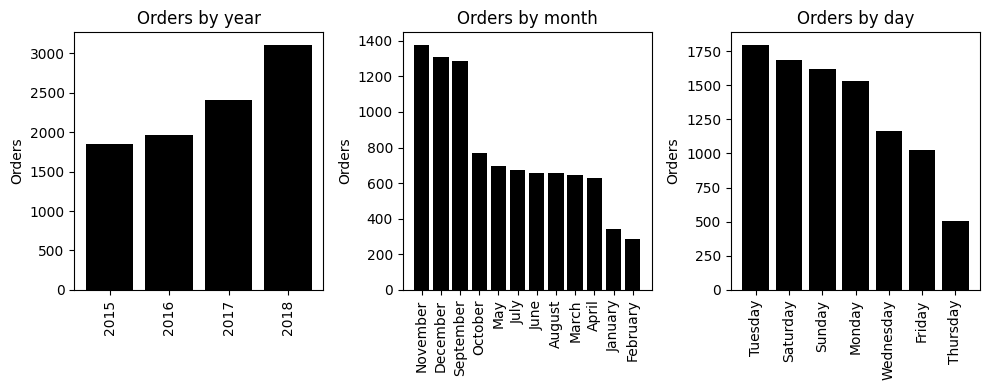

In [17]:
data_df['Order_Year'] = data_df['Order_Date'].dt.year
data_df['Order_Month'] = data_df['Order_Date'].dt.month_name()
data_df['Order_Day'] = data_df['Order_Date'].dt.day_name()

year_counts = data_df['Order_Year'].value_counts()
month_counts = data_df['Order_Month'].value_counts()
day_counts = data_df['Order_Day'].value_counts()

fig, axs = plt.subplots(1,3, figsize=(10,4))

axs[0].set_title('Orders by year')
axs[0].bar(year_counts.index, year_counts.values, color='Black')
axs[0].tick_params('x', labelrotation=90)
axs[0].set_ylabel('Orders')

axs[1].set_title('Orders by month')
axs[1].bar(month_counts.index, month_counts.values, color='Black')
axs[1].tick_params('x', labelrotation=90)
axs[1].set_ylabel('Orders')

axs[2].set_title('Orders by day')
axs[2].bar(day_counts.index, day_counts.values, color='Black')
axs[2].tick_params('x', labelrotation=90)
axs[2].set_ylabel('Orders')

fig.tight_layout()

In [18]:
data_df['Order_Month'] = data_df['Order_Date'].dt.month
data_df['Order_Day'] = data_df['Order_Date'].dt.weekday
data_df['Order_Year'] = data_df['Order_Date'].dt.year

### 2.3. Turnaround time

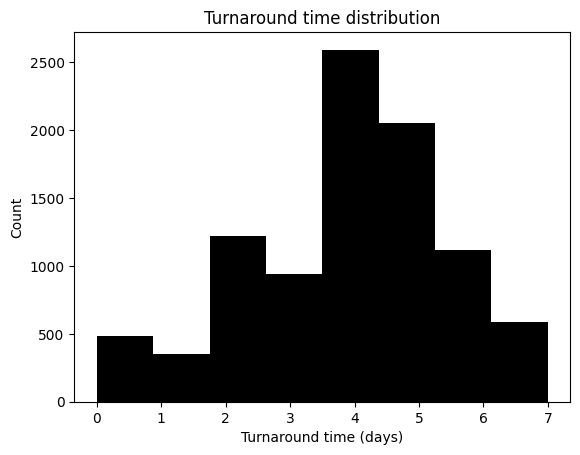

In [19]:
data_df['Turnaround_Time'] = (data_df['Ship_Date'] - data_df['Order_Date']).dt.days

plt.title('Turnaround time distribution')
plt.hist(data_df['Turnaround_Time'], bins=8, color='black')
plt.xlabel('Turnaround time (days)')
plt.ylabel('Count')
plt.show()

In [20]:
data_df.drop(['Order_Date', 'Ship_Date'], axis=1, inplace=True)

## 4. Train-test split

In [21]:
train_df, test_df = train_test_split(data_df, test_size=0.3)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6536 entries, 2434 to 4359
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ship_Mode        6536 non-null   object 
 1   Segment          6536 non-null   object 
 2   City             6536 non-null   object 
 3   State            6536 non-null   object 
 4   Sub_Category     6536 non-null   object 
 5   Sales            6536 non-null   float64
 6   Order_Year       6536 non-null   int32  
 7   Order_Month      6536 non-null   int32  
 8   Order_Day        6536 non-null   int32  
 9   Turnaround_Time  6536 non-null   int64  
dtypes: float64(1), int32(3), int64(1), object(5)
memory usage: 485.1+ KB


## 5. Save

In [22]:
Path('../data/processed').mkdir(parents=True, exist_ok=True)

### 5.1. Sales data

In [ ]:
sales_data = {
    'training': train_df.drop(['Turnaround_Time', 'Ship_Mode'], axis=1),
    'testing': test_df.drop(['Turnaround_Time', 'Ship_Mode'], axis=1)
}

with open('../data/processed/sales.pkl', 'wb') as output_file:
    pickle.dump(sales_data, output_file)

### 5.2. Turnaround time data

In [24]:
turnaround_data = {
    'training': train_df.drop(['Sales'], axis=1),
    'testing': test_df.drop(['Sales'], axis=1)
}

with open('../data/processed/turnaround_time.pkl', 'wb') as output_file:
    pickle.dump(turnaround_data, output_file)